**Objective:** classify Reuters newswires into 46 **exclusive** topics.

-> This is an instance of *single-label, multiclass* classification.

**Reuters dataset:** set of short newswires and their topics, published in 1986. A toy dataset for *text classification*.
Each example is a list of integers (word indices).

In [21]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


# Preparing the data
Vectorize manually:

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: 
- cast the label list as an integer tensor
- use one-hot encoding. 

**One-hot encoding** is a widely used format for categorical data (also called *categorical encoding*). In this case, it consists of embedding each label as an all-zero vector with a 1 in the place of the label index:

In [26]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Build the network
In a stack of ```Dense``` layers, each layer can only access information present in the output of the previous layer. Therefore, each layer can potencially become an information bottleneck. So we need larger layers in comparison to the binary classification exaple. Use 64 units:

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Things to note:
- The last layer is ```Dense``` with 46 units => for each input sample, the network outputs a 46-dimensional vector.
- The last layer uses ```softmax``` activation => the network outputs a *probability* distribution over the 46 different output classes.


# Compiling the model
The best loss function is ```categorical_crossentropy```. It measures
the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. 

In [30]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Validating the aproach
Set apart 1000samples in the training data to use as a validation test:

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train for 20 epochs:

In [32]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 2.6344 - accuracy: 0.4870 - val_loss: 1.7631 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 1.4376 - accuracy: 0.7086 - val_loss: 1.3018 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 1.0524 - accuracy: 0.7742 - val_loss: 1.1351 - val_accuracy: 0.7630
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.8303 - accuracy: 0.8249 - val_loss: 1.0361 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.8636 - val_loss: 0.9673 - val_accuracy: 0.8130
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5324 - accuracy: 0.8913 - val_loss: 0.9178 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4290 - accuracy: 0.9134 - val_loss: 0.8928 - val_accuracy: 0.8130
Epoch 8/20
16/16 [=

## Loss and accuracy curves

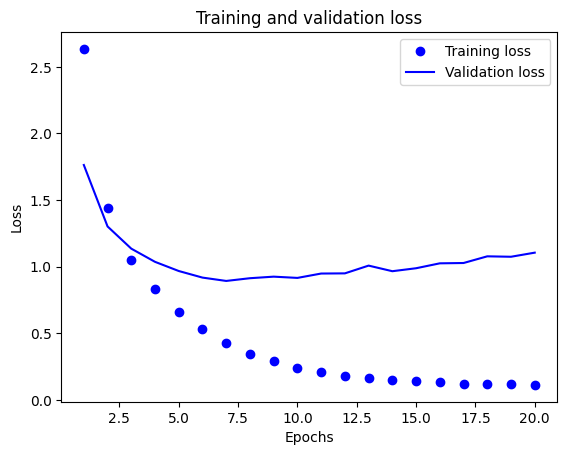

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

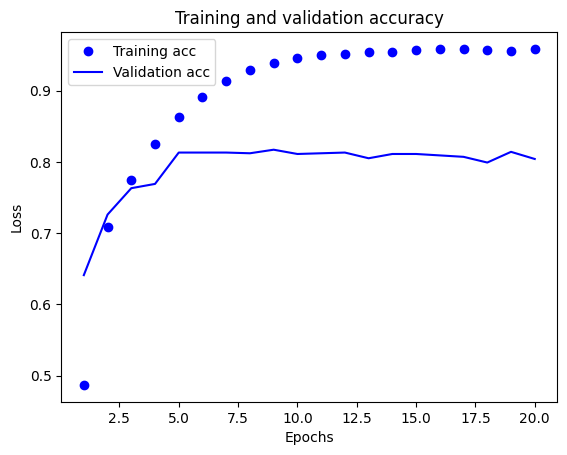

In [34]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**NOTE:** the network begins to overfit after nine epochs! Let's retrain **from scratch** for 9 epochs and evaluate on the *test* set:

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

            
model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 16ms/step - loss: 2.6515 - accuracy: 0.5244 - val_loss: 1.8011 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 0s 7ms/step - loss: 1.4650 - accuracy: 0.7026 - val_loss: 1.3311 - val_accuracy: 0.6930
Epoch 3/9
16/16 [==============================] - 0s 8ms/step - loss: 1.0653 - accuracy: 0.7696 - val_loss: 1.1267 - val_accuracy: 0.7420
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.8207 - accuracy: 0.8265 - val_loss: 1.0044 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 0s 8ms/step - loss: 0.6394 - accuracy: 0.8644 - val_loss: 0.9501 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.5066 - accuracy: 0.8971 - val_loss: 0.9021 - val_accuracy: 0.8100
Epoch 7/9
16/16 [==============================] - 0s 8ms/step - loss: 0.4056 - accuracy: 0.9164 - val_loss: 0.8697 - val_accuracy: 0.8240
Epoch 8/9
16/16 [=========

In [36]:
results

[0.9479038119316101, 0.7965271472930908]

This approach reaches an accuracy of ~80%. With a balanced **binary** classification problem, the accuracy reached by a purely random classifier would be 50%. But **in this case** it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline.

# Generating predictions on new data
Topic predictions for all of the test data:

In [37]:
predictions = model.predict(x_test)

Each entry in ```predictions``` is a vector of length 46, and the coefficients in this vector sum to 1:

In [40]:
print("Entry length: ", predictions[0].shape)
print("Sum of the coefficients of 1 vector: ", np.sum(predictions[0]))

Entry length:  (46,)
Sum of the coefficients of 1 vector:  0.9999999


## How to know the predicted class?
The largest entry is the predicted class (the class with the highest probability):

In [41]:
np.argmax(predictions[0])

3